<a href="https://colab.research.google.com/github/jitendra986/100-Days-of-Deep-Learning/blob/main/regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25, random_state = 2)

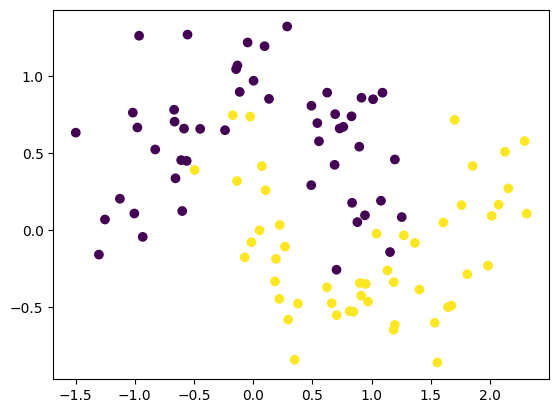

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [4]:


model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [5]:
adam = Adam(learning_rate=0.01)

model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X,y,epochs=2000, validation_split=0.2, verbose=0)

9600/9600 [==============================] - 14s 1ms/step


TypeError: ignored

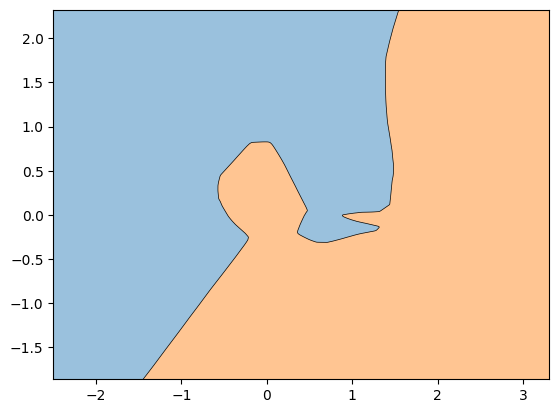

In [7]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

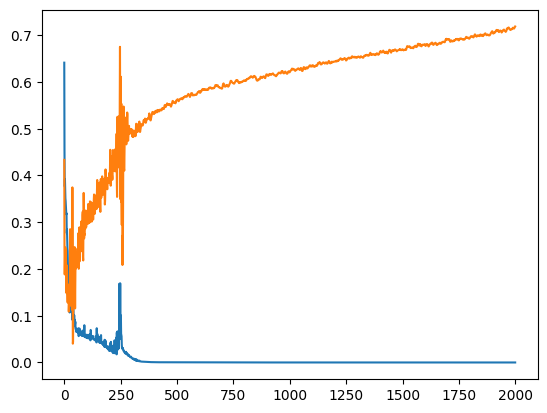

In [8]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [24]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [25]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 13s 1ms/step


TypeError: ignored

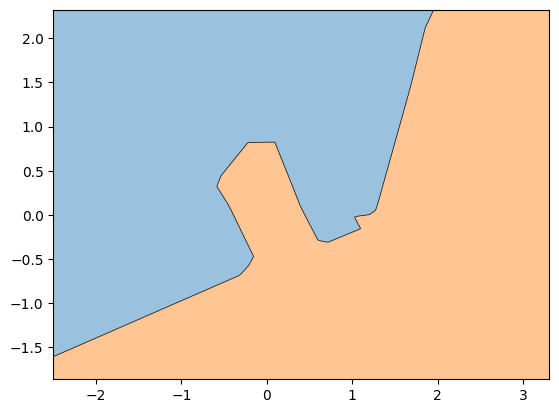

In [26]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

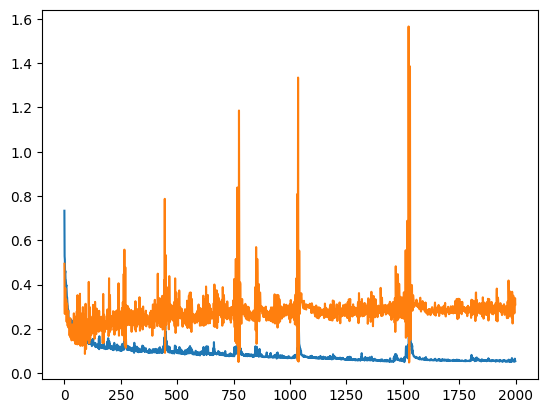

In [27]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [28]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

In [29]:
model1.get_weights()[0].shape
#all weights of layer1
#input layers has 2 units and first hidden layer has 128 units

(2, 128)

In [30]:
model1.get_weights()[0].reshape(256)

array([-0.40705645, -0.60789496,  0.22048333,  0.5363545 , -0.04225699,
       -0.40659142,  0.11681704, -0.380315  , -0.59164554, -0.4533881 ,
        0.14764734,  0.27039197, -0.24875896,  0.328262  ,  0.42005464,
       -0.07860241,  0.10149646,  0.23077258,  0.25172594, -0.5272973 ,
        0.09808432,  0.15050648,  0.00305255, -0.22893862,  0.20914577,
       -0.32412896,  0.10675319, -0.34944865,  0.0723438 , -0.38214466,
        0.21659942,  0.04411104,  0.2440819 , -0.26959097, -0.17013417,
        0.17026031, -0.33996397, -0.61400914,  0.24534972,  0.39123663,
       -0.09139563, -0.23825915,  0.03740296,  0.29656017,  0.5008861 ,
        0.12395052, -0.00491809, -0.20507443,  0.22476701, -0.58584446,
       -0.47770536, -0.20470561,  0.01592354,  0.06807265,  0.43950638,
        0.12835854, -0.51679677,  0.03444775,  0.1230857 , -0.29156685,
        0.4855354 , -0.05436289, -0.23597698, -0.6268819 ,  0.426432  ,
        0.29342508, -0.27959847, -0.5493376 ,  0.23138821, -0.01

In [31]:
model1_weight_layer1.shape

(256,)

<Axes: >

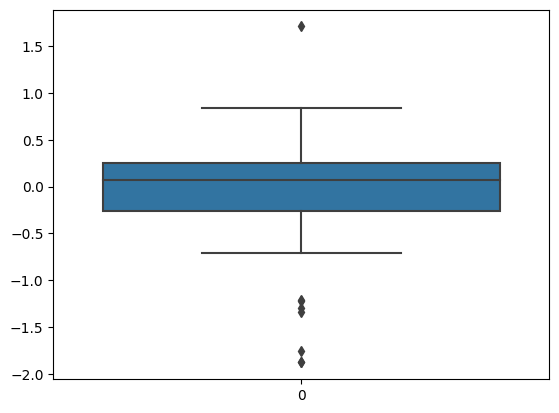

In [32]:
sns.boxplot(model1_weight_layer1)

<Axes: >

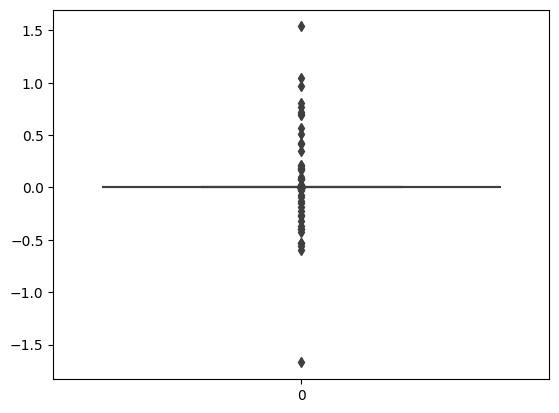

In [33]:
sns.boxplot(model2_weight_layer1)

In [35]:
model1_weight_layer1.min()

-1.8776098

In [36]:
model1_weight_layer1.max()

1.7089499

In [37]:
model2_weight_layer1.min()

-1.6712364

In [38]:
model2_weight_layer1.max()

1.5371848

<ipython-input-39-ace9e13e5e86>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
<ipython-input-39-ace9e13e5e86>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

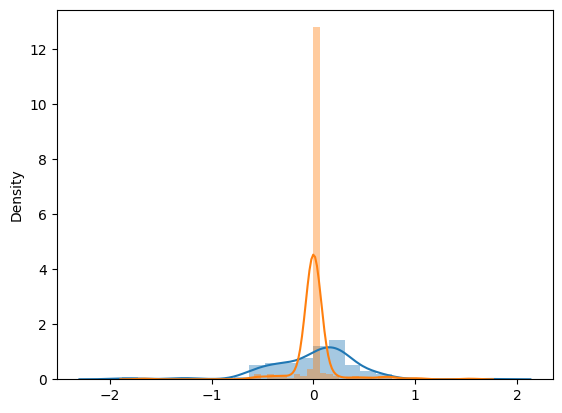

In [39]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)
#blue curve is caused by weight without regularization
#Orange curve is caused by weight with regularization

# L1 Regularization

In [40]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               384       
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [41]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 15s 2ms/step


TypeError: ignored

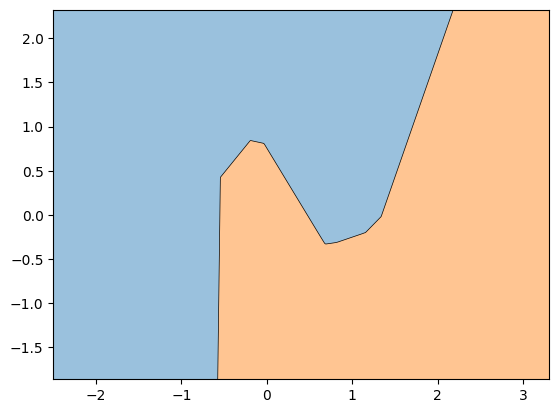

In [43]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

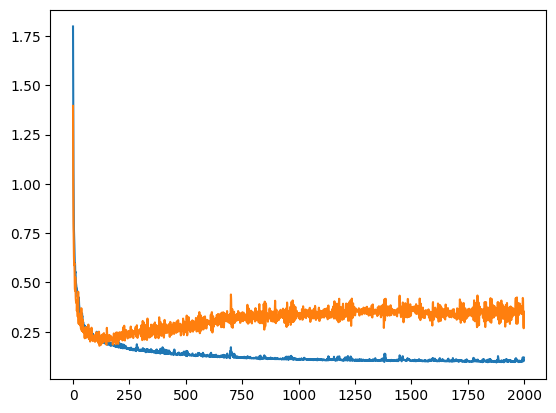

In [44]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])